In [19]:
# Simple CA simulator in Python
#
# *** Forest fire ***
#
# Copyright 2008-2012 Hiroki Sayama
# sayama@binghamton.edu

import matplotlib
matplotlib.use('TkAgg')

import pylab as PL
import random as RD
import scipy as SP
import numpy

RD.seed()

width = 100
height = 100
empty, tree, fire, char = xrange(4)

def init():
    global time, config, nextConfig

    time = 0

    config = SP.zeros([height, width])
    for x in xrange(width):
        for y in xrange(height):
            if RD.random() < initProb:
                state = tree
            else:
                state = empty
            config[y, x] = state
    config[height/2, width/2] = fire

    nextConfig = SP.zeros([height, width])

def draw():
    PL.cla()
    PL.pcolor(config, vmin = 0, vmax = 3, cmap = PL.cm.binary)
    PL.axis('image')
    PL.title('t = ' + str(time))

def step():
    global time, config, nextConfig

    time += 1

    for x in xrange(width):
        for y in xrange(height):
            state = config[y, x]
            if state == fire:
                state = char
            elif state == tree:
                for dx in xrange(-1, 2):
                    for dy in xrange(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == fire:
                            state = fire
            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config



#import pycxsimulator
#pycxsimulator.GUI().start(func=[init,draw,step])

num_array = range(0,11)
p_array = []
for _ in num_array:
    p_array.append(_/10.)


time_array =[]
burn_array = []

for p in p_array:
    initProb = p
    x_time = []
    x_burn = []
    for x in xrange(10):
        init()
        done = False
        while not done:
            #if time%10 == 0:
                #print time
            step()
            if numpy.array_equal(config, nextConfig):
                done = True
        x_time.append(time)
        x_burn.append(len(config[numpy.where(config == 3)]))
    print "complete!"
    
    time_array.append(numpy.mean(x_time))
    burn_array.append(numpy.mean(x_burn))
print "Done!"
        
    
 





/Users/Isaac/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/Isaac/anaconda/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/Isaac/anaconda/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/Isaac/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/Isaac/anaconda/lib/python2.7/site-packages/traitlets/config/application.py", line 596, in launch_instance
    app.start()
  File "/Users/Isaac/anaconda/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 442, i

complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
complete!
Done!


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


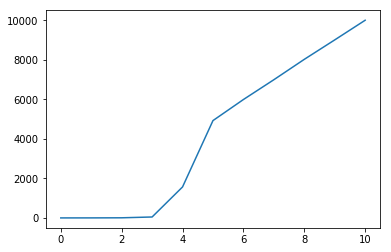

In [21]:
%matplotlib inline 

x_arrays = range(0,11)
print x_arrays


PL.plot(x_arrays, burn_array)
PL.show()

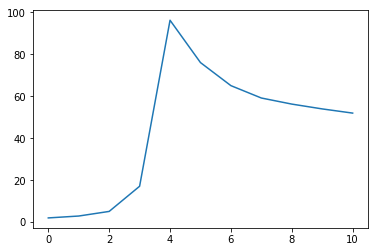

In [22]:
PL.plot(x_arrays, time_array)
PL.show()

In [18]:

num_array = range(0,11)
p_array = []
for _ in num_array:
    p_array.append(_/10.)

# For all p_array we have two plots
# Plot 1: total burned area as function of p
# Plot 2: plot the time until fire stops spreading as function of p
# Plot 3: % of trees burned?
print p_array

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


In [26]:
burned = config[numpy.where(config == 3)]
len(burned)

3452

[inf, 0.0023, 0.0035, 0.015966666666666667, 0.391925, 0.98488, 0.9982666666666667, 0.9987142857142857, 1.0027625, 1.0006, 1.0]
[0, 0.0023, 0.0035, 0.015966666666666667, 0.391925, 0.98488, 0.9982666666666667, 0.9987142857142857, 1.0027625, 1.0006, 1.0]


/Users/Isaac/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in double_scalars


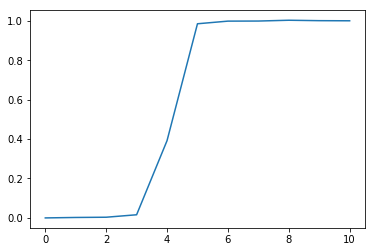

In [29]:
total_possible = 100*100
trees_array = []
for p in p_array:
    trees_array.append(p*10000)

percent_array = []

# for i in x_arrays:
#     percent_array.append(burn_array[i]/trees_array[i])

# x_arrays = range(0,11)
# print x_arrays
print percent_array
percent_array[0] = 0
print percent_array



PL.plot(x_arrays, percent_array)
PL.show()